## Motivation {.unnumbered}



In [84]:
## set up environment
suppressMessages({
library(scUnify)
library(clustree)
setwd("/nemo/lab/caladod/working/Matthew/project/matthew/MH_GSE247917")})

## import seurat objects
obj <- qread("seurat/1_processing/1.4_GSE247917_qc.qs")

In [85]:
obj <- join_layers(obj)

In [86]:
obj <- return_genes(obj, from.assay = "TCR", to.assay = "RNA")
obj <- return_genes(obj, from.assay = "BCR", to.assay = "RNA")

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”


In [92]:
obj.list <- SplitObject(obj, split.by = "samples")

In [88]:
## store a list of 10x output directories as a vector & define sample names
dir <- "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/"
samples = list.files(dir)
dir.list <- paste0(dir, samples, "/outs/per_sample_outs/", samples, "/count/sample_filtered_feature_bc_matrix/")
dir.list

[1] "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/CV10/outs/per_sample_outs/CV10/count/sample_filtered_feature_bc_matrix/"
[2] "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/CV12/outs/per_sample_outs/CV12/count/sample_filtered_feature_bc_matrix/"

In [93]:
for(i in seq_along(obj.list)){
    obj.list[[i]] <- run_decontx(x = obj.list[[i]], raw.dir = dir.list[i], cluster = "integrated_snn_res.0.2")}

10X data contains more than one type and is being returned as a list containing matrices of each type.

--------------------------------------------------

Starting DecontX

--------------------------------------------------

Thu Nov  7 17:47:54 2024 .. Analyzing all cells

Thu Nov  7 17:47:54 2024 .... Generating UMAP

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Thu Nov  7 17:48:32 2024 .... Estimating contamination

Thu Nov  7 17:48:36 2024 ...... Completed iteration: 10 | converge: 0.004845

Thu Nov  7 17:48:39 2024 ...... Completed iteration: 20 | converge: 0.001689

Thu Nov  7 17:48:41 2024 ...... Completed iteration: 26 | converge: 0.0008878

Thu Nov  7 17:48:41 2024 .. Calculating fi

In [94]:
obj.list[[1]]

An object of class Seurat 
60789 features across 19484 samples within 5 assays 
Active assay: integrated (14868 features, 2000 variable features)
 2 layers present: data, scale.data
 4 other assays present: RNA, HTO, ADT, SCT
 2 dimensional reductions calculated: pca, umap

In [95]:
head(obj.list[[1]]@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,nCount_ADT,nFeature_ADT,samples,pct.mt,pct.rb,⋯,integrated_snn_res.0.3,integrated_snn_res.0.4,integrated_snn_res.0.5,integrated_snn_res.0.6,integrated_snn_res.0.7,integrated_snn_res.0.8,integrated_snn_res.0.9,integrated_snn_res.1,seurat_clusters,sc.decontx
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
CV10_AAACCTGAGAAGCCCA-1,SeuratProject,2074.567,1226,91,3,1336,58,CV10,2.602410,11.036145,⋯,2,1,0,0,1,6,9,10,10,0.0002178071
CV10_AAACCTGAGAGGGATA-1,SeuratProject,4104.951,2208,257,3,1008,57,CV10,4.449307,7.537078,⋯,3,4,2,1,0,0,0,0,0,0.0022410821
CV10_AAACCTGAGAGTGACC-1,SeuratProject,1215.489,786,88,2,829,57,CV10,3.201970,18.226601,⋯,1,3,4,3,4,1,4,5,5,0.0023324122
CV10_AAACCTGAGATATGGT-1,SeuratProject,5918.842,2869,599,4,3661,57,CV10,5.706205,5.905839,⋯,2,1,0,0,1,6,9,10,10,0.0158028445
CV10_AAACCTGAGCCAGTAG-1,SeuratProject,1321.030,777,70,3,1216,58,CV10,3.479576,23.146747,⋯,1,2,4,2,4,1,5,5,5,0.0008141705
CV10_AAACCTGAGCGATATA-1,SeuratProject,1740.336,1134,84,4,700,57,CV10,4.016064,6.368330,⋯,3,4,2,1,0,0,0,0,0,0.0017315294


In [96]:
obj <- merge(obj.list[[1]], obj.list[2:length(obj.list)])

## Quick Processing

In [97]:
obj <- join_layers(obj)

In [98]:
obj <- integrate_v4(obj, split.by = "samples", assay = "RNA", nfeatures = 2000, method = "rpca", k.weight = 100)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 22163 by 19484

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 164 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 22163 genes

Computing corrected count matrix for 22163 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.324553 mins

Determine variable features

Centering data matrix

Getting residuals for block 1(of 4) for counts dataset

Getting residuals for block 2(of 4) for counts dataset

Getting residuals for block 3(of 4) for counts dataset

Getting residuals for block 4(of 4) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Warning message:
“Different cells and/o

  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ACTATCTGTATATGAG-1 .. CV10_ATGTGTGGTATTCTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ATGTGTGGTCGACTAT-1 .. CV10_CATTATCAGGTCATCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CATTATCAGTACGATA-1 .. CV10_CGGAGTCTCTCTTGAT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CGGAGTCTCTTAGCCC-1 .. CV10_CTTAACTTCGAATGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CTTAACTTCGCCATAA-1 .. CV10_GCCTCTACAATCAGAA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GCCTCTACACAGCCCA-1 .. CV10_GTACGTATCTGGTATG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GTACTCCAGACTCGGA-1 .. CV10_TATCAGGTCTTGCATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_TATCAGGTCTTGGGTA-1 .. CV10_TGGACGCAGCCCAATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 1484 cells: CV10_TGGACGCAGCGACGTA-1 .. CV10_TTTGTCATCTTTAGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%
[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”
sct.model: counts on 2000 cells: CV12_AAACCTGAGAGCCTAG-1 .. CV12_ACTTACTGTTTACTCT-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_ACTTACTTCAATCACG-1 .. CV12_CAAGATCCAAGCTGTT-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CAAGATCCAATGAAAC-1 .. CV12_CCTAAAGGTGGAAAGA-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CCTAAAGGTGTCAATC-1 .. CV12_CTCACACAGGTACTCT-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CTCACACAGTGGGCTA-1 .. CV12_GATCGTATCACGGTTA-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GATCGTATCATACGGT-1 .. CV12_GGGATGACAGCTATTG-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GGGATGACAGCTCGCA-1 .. CV12_TACTTGTGTCGGCTCA-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_TACTTGTGTCTCTTAT-1 .. CV12_TGCTGCTTCGCCCTTA-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%


sct.model: counts on 1366 cells: CV12_TGCTGCTTCGGCGCTA-1 .. CV12_TTTGTCATCTGCCCTA-1

Setting min_variance to:  0.00223402397346913

Calculating residuals of type pearson for 12277 genes



  |======================================================================| 100%
[1] 2


Warning message:
“Different cells and/or features from existing assay SCT”
Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Assay integrated changing from SCTAssay to Assay”
Warning message:
“Different cells and/or features from existing assay integrated”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.9 GiB”
Warning message:
“Assay integrated changing from Assay to SCTAssay”
Warning message:
“Different cells and/or features from existing assay SCT”


In [99]:
obj

An object of class Seurat 
60455 features across 36850 samples within 5 assays 
Active assay: integrated (14277 features, 2000 variable features)
 2 layers present: data, scale.data
 4 other assays present: RNA, HTO, ADT, SCT

PC_ 1 
Positive:  ZNF385D, CDK6, CCSER1, WDFY4, CD74, MED12L, HIST1H2AI, HLA-DQA1, DPY19L2, STMN1 
	   ATP8B4, DEPTOR, HLA-DRB1, GUCY1B1, HIST1H1B, NFE2, CPVL, HLA-DPA1, HLA-DPB1, HLA-DQB1 
	   SHTN1, ZNRF1, IRF8, HIST1H3H, HLA-DRA, H1F0, MPP1, MSI2, FCER1A, SOX4 
Negative:  SEPTIN5, GNLY, ERBB2, IL7R, NKG7, AL050309.1, IFI30, FCGR3A, PRF1, FOS 
	   TGFBR3, CTSW, CTSS, SERPINA1, RNF213, COA4, RNF135, CCL5, CST7, NADK 
	   FGFBP2, AC007569.1, GZMA, PLAAT4, JUNB, PDE3B, FCN1, ITK, CD5, FTL 
PC_ 2 
Positive:  LYZ, S100A9, VCAN, FOS, CD74, IFI30, S100A8, PSAP, FTL, FCN1 
	   CST3, FTH1, NAMPT, SAT1, CTSS, SERPINA1, MNDA, CYBB, AIF1, TNFAIP2 
	   SPI1, CD36, DMXL2, NEAT1, PLXDC2, SLC8A1, LRMDA, TYMP, TYROBP, FGL2 
Negative:  GNLY, NKG7, PRF1, IL7R, CCL5, CTSW, CD247, ZNF385D, MALAT1, INPP4B 
	   GZMB, KLRK1, ETS1, ITK, SYNE2, IL2RG, SKAP1, IL2RB, CD69, CST7 
	   CD96, THEMIS, PYHIN1, NELL2, SPOCK2, STAT4, ZAP70, SYNE1, CD7, SPON2 
PC_ 3 
Positive:  ZNF385D, GNLY, NKG7, PRF1, CX3CR1, FCGR3A,

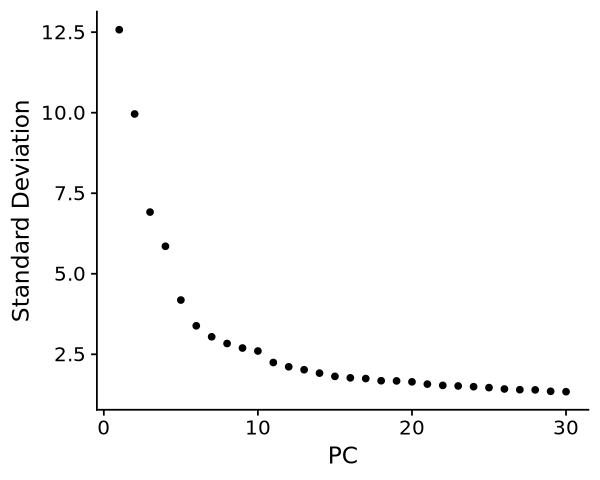

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)
obj <- RunPCA(obj)
ElbowPlot(obj, ndims = 30, reduction = "pca")

In [101]:
obj <- RunUMAP(obj, dims = 1:5, reduction = "pca", reduction.name = "umap", assay = "integrated", verbose = FALSE)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



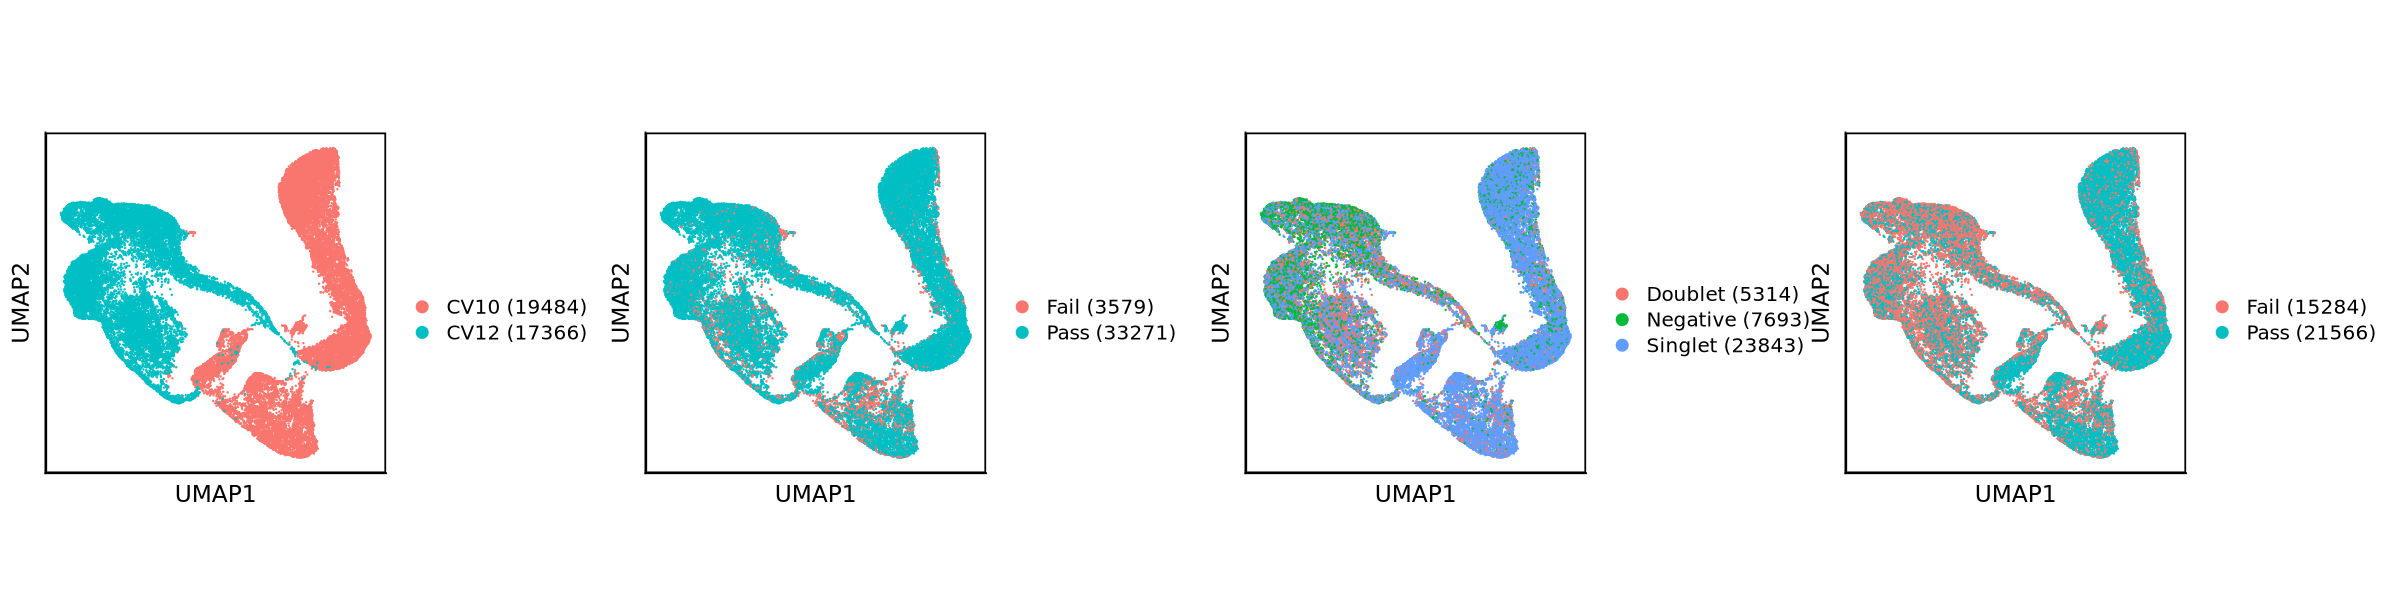

: 

In [ ]:
options(repr.plot.width=20, repr.plot.height=5)
p1 <- scUMAP(obj, reduction = "umap", group.by = "samples", count = T)
p2 <- scUMAP(obj, reduction = "umap", group.by = "softqc", count = T)
p3 <- scUMAP(obj, reduction = "umap", group.by = "MULTI.global", count = T)
p4 <- scUMAP(obj, reduction = "umap", group.by = "finalqc", count = T)
plot_grid(p1, p2, p3, p4, ncol = 4, align = "hv")

In [48]:
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:10, verbose = F)
obj <- FindClusters(obj, resolution = seq(0.1, 1, 0.1), algorithm = 1, verbose = F)
clustree <- clustree(obj@meta.data, prefix = paste0("integrated_snn_res."))

ERROR: Error in RunModularityClusteringCpp(SNN, modularity, resolution, algorithm, : c++ exception (unknown reason)


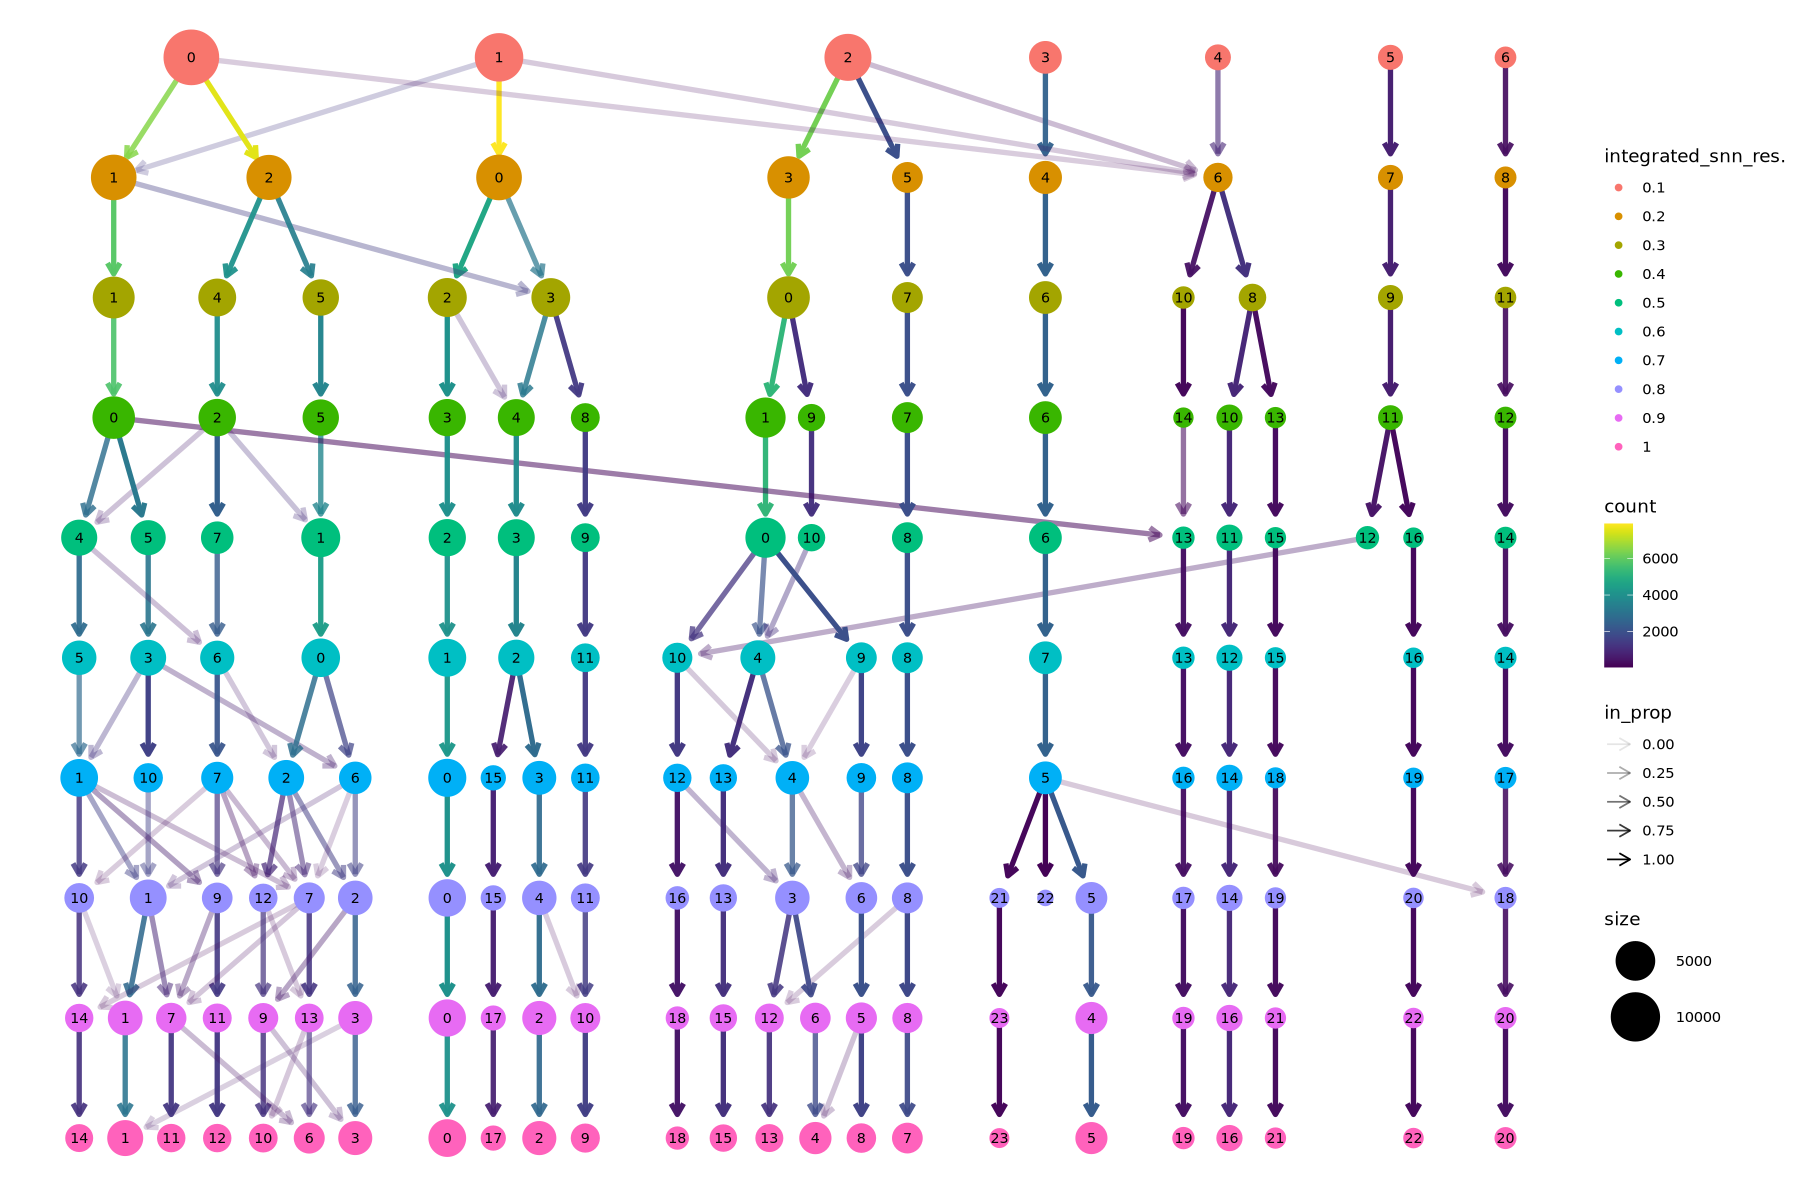

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
print(clustree)

In [ ]:
obj

An object of class Seurat 
60789 features across 36850 samples within 7 assays 
Active assay: integrated (14868 features, 2000 variable features)
 2 layers present: data, scale.data
 6 other assays present: RNA, HTO, ADT, BCR, TCR, SCT
 2 dimensional reductions calculated: pca, umap

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


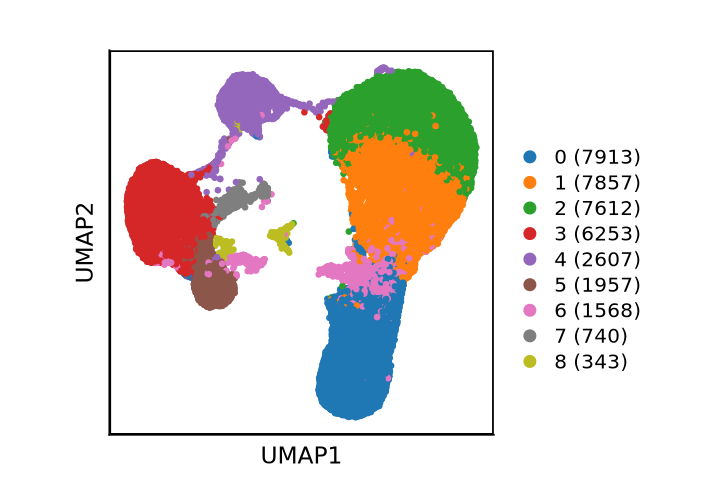

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "integrated_snn_res.0.2", count = T, pt.size = 1.2, cols = palette_list[["vega_10"]])

In [ ]:
qsave(obj, "seurat/1_processing/1.5_GSE247917_decont.qs")

In [91]:
run_decontx <- function(x, raw.dir, cluster = NULL, assay = "RNA"){
    toc <- x[[assay]]$counts
    tod <- Read10X(raw.dir)[["Gene Expression"]]
    colnames(tod) <- paste0(gsub("_.*", "", colnames(toc)[1]), "_", colnames(tod))
    tod <- tod[rownames(toc), which(!colnames(tod) %in% colnames(toc))]
    output <- celda::decontX(toc, background = tod, z = cluster)

    ## add contamination score
    score <- data.frame(sc.decontx = output$contamination)
    rownames(score) <- colnames(output$decontXcounts)
    x <- AddMetaData(x, score)

    ## add decontaminated counts
    rna.clean <- as(output$decontXcounts[,colnames(x)], "sparseMatrix")
    x[[assay]] <- CreateAssay5Object(counts = rna.clean, min.cells = 0, min.features = 0)
    return(x)
    }